<a href="https://colab.research.google.com/github/ttma333/python/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4_%EC%A3%BC%EC%8B%9D%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참조링크

https://velog.io/@lazy_learner/LSTM-%EC%8B%9C%EA%B3%84%EC%97%B4-%EC%98%88%EC%B8%A1-%EB%AA%A8%EB%93%88-%EB%A7%8C%EB%93%A4%EA%B8%B0-1




In [2]:
from tensorflow.python import train
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [4]:
cd/content/drive/MyDrive/dataset

/content/drive/MyDrive/dataset


In [5]:
df=pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,17.481333,17.533333,17.188000,17.276667,17.276667,39163500
1,2015-07-13,17.483334,17.503332,17.070000,17.477333,17.477333,44404500
2,2015-07-14,17.473333,17.732668,17.367332,17.709999,17.709999,28614000
3,2015-07-15,17.782667,17.832666,17.472000,17.542667,17.542667,30324000
4,2015-07-16,17.614668,17.813334,17.544001,17.778667,17.778667,24240000


In [6]:
df.shape

(1259, 7)

In [7]:
training_set = df.iloc[:800,1:2].values
test_set = df.iloc[800:,1:2].values


In [8]:
print(training_set.shape,test_set.shape)

(800, 1) (459, 1)


In [9]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
# time-steps:60, output:1
x_train = []
y_train = []

for i in range(60,800):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [11]:
print(y_train[0]) # 첫번째 y값 인덱스 61
x_train[1][-1] # 두번째 x_train 인덱스 1-61

0.43589637508483803


array([0.43589638])

In [13]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.summary()

model.compile(optimizer='adam',loss='mean_squared_error')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                

In [16]:
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0038
Epoch 2/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0045
Epoch 3/100
24/24 [==============================] - 0s 10ms/step - loss: 0.0040
Epoch 4/100
24/24 [==============================] - 0s 10ms/step - loss: 0.0039
Epoch 5/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0049
Epoch 6/100
24/24 [==============================] - 0s 10ms/step - loss: 0.0037
Epoch 7/100
24/24 [==============================] - 0s 10ms/step - loss: 0.0037
Epoch 8/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0041
Epoch 9/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0043
Epoch 10/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0037
Epoch 11/100
24/24 [==============================] - 0s 10ms/step - loss: 0.0040
Epoch 12/100
24/24 [==============================] - 0s 11ms/step - loss: 0.0041
Epoch 13/100
24/24 [=====

In [22]:
#테스트 데이터 준비
training_set = df.iloc[:800,1:2]
test_set = df.iloc[800:,1:2]

total = df['Open']
inputs = total[len(total)-len(test_set)-60:].values
inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)

x_test = []
for i in range(60,519):
  x_test.append(inputs[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

print(x_test.shape)

(459, 60, 1)


In [31]:
predict = model.predict(x_test)
predict = sc.inverse_transform(predict)

15/15 [==============================] - 1s 4ms/step


Text(0, 0.5, 'tesla stock price')

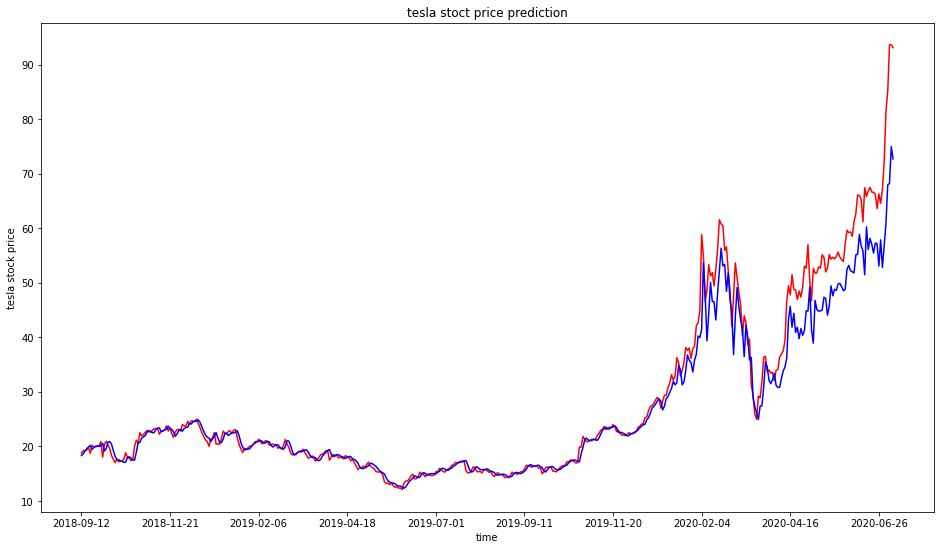

In [32]:
#시각화
plt.figure(figsize=(16,9))
plt.plot(df.loc[800:,'Date'],test_set.values,color='red',label='real tesla stock price')
plt.plot(df.loc[800:,'Date'],predict,color='blue',label='predict tesla stock price')
plt.xticks(np.arange(0,459,50))
plt.title('tesla stoct price prediction')
plt.xlabel('time')
plt.ylabel('tesla stock price')

In [30]:
from keras.layers import Flatten
model = keras.Sequential()
for i in range(2):
  if i == 0:
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
    model.add(Dropout(0.1))
  else :
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1,activation = 'relu'))
model.compile(loss = 'mse',optimizer = 'adam',metrics = ['mae'])
history=model.fit(x_train,y_train,epochs = 100)
model.summary()

Epoch 1/100
24/24 [==============================] - 3s 10ms/step - loss: 0.0538 - mae: 0.1681
Epoch 2/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0198 - mae: 0.1126
Epoch 3/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0118 - mae: 0.0873
Epoch 4/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0107 - mae: 0.0828
Epoch 5/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0104 - mae: 0.0814
Epoch 6/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0092 - mae: 0.0756
Epoch 7/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0089 - mae: 0.0743
Epoch 8/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0085 - mae: 0.0726
Epoch 9/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0077 - mae: 0.0685
Epoch 10/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0077 - mae: 0.0688
Epoch 11/100
24/24 [==============================] - 0s 8

## 케라스 모듈로 시계열 만들기

In [49]:
from keras.utils import timeseries_dataset_from_array
sampling_rate = 1
sequence_length = 60
delay = sampling_rate*(sequence_length+1)
train_sample = 800
df['open']

In [62]:
abc=timeseries_dataset_from_array(
    money[:-delay],
    targets=money[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    batch_size= 760,
    start_index = 0,
    end_index = 799
)

In [54]:
money=pd.DataFrame(df['Open'])

In [55]:
money

,Open
0,17.481333
1,17.483334
2,17.473333
3,17.782667
4,17.614668
...,...
1254,81.431999
1255,85.112663
1256,93.667336
1257,93.666664


In [63]:
for samples,targets in abc:
  print("샘플크기:",samples.shape)
  print("타깃크기:",targets.shape)
  break

샘플크기: (740, 60, 1)
타깃크기: (740, 1)
